In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Гипотеза/вопрос исследования:
Объясняется ли показатель (количество судов)/(количество полисов ОСАГО) в разрезе Страховых компаний и Регионов от

1) Размера средней выплаты

2) Размера средней страховой премии

3) Региона

## Задача
Обучить линейную регрессию на параметрах 1) - 3) для предсказания целевого значения. По оценке на тесте потвердить или опровергнуть гипотезу.

## Используемые данные:
- Данные по судебным делам по ОСАГО за 2019 г. в 8 регионах
- Статистика ЦБ РФ по ключевым показателям деятельности страховых компаний по ОСАГО за 2019 г.

## Считываем данные 
* списки страховых
* списки регионов

In [2]:
df1 = pd.read_excel('all_data.xlsx')
df2 = pd.read_excel('CB_OSAGO_2019.xlsx') 
df2[df2['Страховые премии 2019'] > 0].shape[0]

2678

In [3]:
Insurance_company = ['АК БАРС Страхование', 'ВТБ Страхование', 'Ингосстрах',
                    'МетЛайф', 'Райффайзен Лайф', 'Сбербанк страхование', 'СОГАЗ',
                    'СОГАЗ-ЖИЗНЬ', 'АИГ', 'АльфаСтрахование', 'РЕСО-Гарантия', 'ВСК',
                    'Ингосстрах-Жизнь', 'ППФ Страхование жизни', 'РСХБ-Страхование',
                    'СиВ Лайф', 'МАКС', 'Ренессанс Страхование', 'Росгосстрах',
                     'Мегарусс-Д', 'Геополис', 'Страховая бизнес группа', 
                    'Адонис', 'Пари', 'Полис-Гарант', 'Медэкспресс', 'Allianz', 'Либерти',
                    'Зетта', 'ЭРГО', 'ВСК', 'Альянс', 'Альфа', 'Ренессанс', 'Тинькофф', 'Аско','РЕСО',
                    "\"Согласие\"", 'Абсолют', 'Ренесанс', 'ЭНЕРГОГАРАНТ']


regions_df1 = ['Санкт-Петербург', 
               'Краснодар', 
               'Московская область', 
               'Нижний Новгород', 
               'Ростов', 
               'Владивосток',
               'Москва', 
               'Екатеринбург']


regions_df2 = ['Ленинградская область', 
               'Город Москва столица Российской Федерации город федерального значения',
               'Город Санкт-Петербург город федерального значения',
               'Московская область',
               'Ростовская область',
               'Свердловская область',
               'Нижегородская область',
               'Приморский край',
               'Краснодарский край']

In [4]:
df1.head()

,category,clainmant,court,date,defendant,id,name_judge,result,Регион
0,"Иски, связанные с возмещением ущерба → О взыск...",Кучеренко Зульфия Бахтияровна,Анапский районный суд Краснодарского края,2019-11-27,"""АльфаСтрахование""",2-1201/2019 ~ М-1172/2019,Киндт Светлана Алексеевна,Вынесено решение по делу,Краснодар
1,"Иски, связанные с возмещением ущерба → О взыск...",Кремнев Артем Андреевич,Тимашевский районный суд Краснодарского края,2019-05-29,"""АО группа Ренессанс Страхование""",2-580/2019 ~ М-425/2019,Зелюка Павел Александрович,Вынесено решение по делу,Краснодар
2,"Иски, связанные с возмещением ущерба → Иски о ...",Дорохова Нина Афанасьевна,Красногорский городской суд Московской области,2019-11-12,"""ВСК СТРАХОВОЙ ДОМ""",2-745/2020 (2-6843/2019;) ~ М-4850/2019,Комиссарова Н.Н.,Производство по делу приостановлено,Московская область
3,"Иски, связанные с возмещением ущерба → О взыск...",Литвинова Анна Олеговна,Дальнереченский районный суд Приморского края,2019-01-02,"""ВСК"" Страховой дом",2-657/2018 ~ М-682/2018,Ляшко О.В.,Ходатайство/заявление УДОВЛЕТВОРЕНО,Владивосток
4,"Иски, связанные с возмещением ущерба → О взыск...",Дятлов Александр Георгиевич,Дальнереченский районный суд Приморского края,2019-02-07,"""ВСК"" Страховой дом",2-728/2018 ~ М-763/2018,Ляшко О.В.,Ходатайство/заявление УДОВЛЕТВОРЕНО,Владивосток


In [5]:
df2.head()

,Страховая,Регион,Выплаты 2019,Заключенные договора 2019,Страховые премии 2019,Средняя премия 2019,Средняя выплата 2019
0,"АО ""Тинькофф Страхование""",Алтайский край,9449.69055,4840,24529.51090,5.068081,62.800112
1,"АО ""Тинькофф Страхование""",Краснодарский край,39190.03329,19872,119853.62230,6.031281,62.800112
2,"АО ""Тинькофф Страхование""",Красноярский край,12338.29609,6954,42710.93170,6.141923,62.800112
3,"АО ""Тинькофф Страхование""",Приморский край,9490.85633,4359,25091.95518,5.756356,62.800112
4,"АО ""Тинькофф Страхование""",Ставропольский край,22208.20139,11152,47827.83741,4.288723,62.800112


### Оставляем у таблицы судов только Страховые-ответчики и регионы

In [6]:
df1 = df1[['defendant', 'Регион']]
df1.to_excel('Params_2019.xlsx')
df1.head(10)

,defendant,Регион
0,"""АльфаСтрахование""",Краснодар
1,"""АО группа Ренессанс Страхование""",Краснодар
2,"""ВСК СТРАХОВОЙ ДОМ""",Московская область
3,"""ВСК"" Страховой дом",Владивосток
4,"""ВСК"" Страховой дом",Владивосток
5,"""ВСК"" Страховой дом",Владивосток
6,"""ВСК"" Страховой дом",Владивосток
7,"""ВСК"" Страховой дом",Владивосток
8,"""ВСК"" Страховой дом",Владивосток
9,"""ВСК"", Зуева Н.С.",Москва


### Унифицируем регионы для таблицы данных ЦБ РФ

In [7]:
df2 = df2[df2['Регион'].isin(regions_df2) == True].reset_index(drop=True)

df2 = df2.replace({'Регион' : {'Краснодарский край' : 'Краснодар', 
                               'Свердловская область' : 'Екатеринбург', 
                               'Город Москва столица Российской Федерации город федерального значения' : 'Москва',
                               'Ростовская область' : 'Ростов',
                               'Приморский край' : 'Владивосток',
                               'Нижегородская область' : 'Нижний Новгород',
                               'Город Санкт-Петербург город федерального значения' : 'Санкт-Петербург',
                               'Ленинградская область' : 'Санкт-Петербург'}
                  })


df2.head(10)

,Страховая,Регион,Выплаты 2019,Заключенные договора 2019,Страховые премии 2019,Средняя премия 2019,Средняя выплата 2019
0,"АО ""Тинькофф Страхование""",Краснодар,3.919003e+04,19872,1.198536e+05,6.031281,62.800112
1,"АО ""Тинькофф Страхование""",Владивосток,9.490856e+03,4359,2.509196e+04,5.756356,62.800112
2,"АО ""Тинькофф Страхование""",Нижний Новгород,2.282910e+04,9217,6.536806e+04,7.092119,62.800112
3,"АО ""Тинькофф Страхование""",Санкт-Петербург,4.871250e+04,31324,2.336083e+05,7.457805,62.800112
4,"АО ""Тинькофф Страхование""",Санкт-Петербург,9.470782e+03,6009,3.741368e+04,6.226274,62.800112
5,"АО ""Тинькофф Страхование""",Москва,4.603383e+05,68224,5.594084e+05,8.199583,62.800112
6,"АО ""Тинькофф Страхование""",Московская область,3.993357e+04,28002,2.222683e+05,7.937587,62.800112
7,"АО ""Тинькофф Страхование""",Ростов,2.865863e+04,13896,7.981792e+04,5.743949,62.800112
8,"АО ""Тинькофф Страхование""",Екатеринбург,2.240263e+04,19402,1.256341e+05,6.475315,62.800112
9,"АО ""АльфаСтрахование""",Краснодар,1.433961e+06,293572,1.567389e+06,5.339027,61.639939


### Унифицируем страховые для 2-х таблиц

In [8]:
list_str = list(df2['Страховая'].unique())
df1_tmp = df1
df1 = df1_tmp

In [9]:
(list_str)

['АО  "Тинькофф  Страхование"',
 'АО "АльфаСтрахование"',
 'АО "Боровицкое страховое общество"',
 'АО "ГСК "Югория"',
 'АО "МАКС"',
 'АО "СК "Астро-Волга"',
 'АО "СО "Талисман"',
 'АО "СОГАЗ"',
 'АО "Страховая бизнес группа"',
 'АО СК " Армеец"',
 'АО СК "БАСК"',
 'АО СК "Двадцать первый век"',
 'АО СК "Чулпан"',
 'ООО  "Зетта Страхование"',
 'ООО "Абсолют Страхование"     ',
 'ООО "НСГ-"Росэнерго"',
 'ООО "ПРОМИНСТРАХ"',
 'ООО "СК "СЕРВИСРЕЗЕРВ"',
 'ООО "СК "Согласие"',
 'ООО "Страховая компания "СДС" ',
 'ООО "Страховое общество "Сургутнефтегаз"',
 'ООО СК "Паритет-СК"',
 'ООО СО "ВЕРНА"',
 'ООО Страховая Компания  "Гелиос"',
 'ПАО "САК "ЭНЕРГОГАРАНТ"',
 'ПАО СК "Росгосстрах"',
 'САО "ВСК"',
 'САО "Медэкспресс"',
 'САО "Надежда"',
 'САО ЭРГО',
 'СПАО "Ингосстрах"',
 'СПАО "РЕСО-Гарантия"',
 'АО "Группа Ренессанс Страхование"',
 'АО "СК "ПАРИ"',
 'АО "СК ГАЙДЕ"',
 'ООО  "СК "Мегарусс-Д"',
 'ООО "СФ "Адонис"',
 'ООО РСО  "ЕВРОИНС"',
 'ООО СО "Геополис"',
 'ПАО "АСКО-СТРАХОВАНИЕ"',
 'Ли

In [10]:
for i in range(0, df1_tmp.shape[0]):
    flag = False    
    for name in Insurance_company:
        if not (df1_tmp['defendant'][i].lower().find(name.lower()) == -1):
            for str_name in list_str:
                if not (name.lower().find('Ренесанс') == -1):
                    df1_tmp['defendant'][i] = 'АО "Группа Ренессанс Страхование"'
                    flag = True
                    break
                if not (str_name.lower().find(name.lower()) == -1):
                    df1_tmp['defendant'][i] = str_name
                    flag = True
                    break
                else:
                    continue
        else:
            continue
        break
    if not (flag):
        df1_tmp['defendant'][i] = '###' + df1_tmp['defendant'][i]

In [11]:
data = {'defendant': [], 'Регион': []}
new_df = pd.DataFrame(data)
j = 0
for i in range(0, df1_tmp.shape[0]):
    flag = False
    name = df1_tmp['defendant'][i].lower()
    for str_name in list_str:
        if not (str_name.lower().find(name.lower()) == -1):
            flag = True
            break
        else:
            continue
    if not (flag):
        new_df.loc[j] = df1_tmp.loc[i]
        df1_tmp['defendant'][i] = 'delete'
        j += 1
    else:
        continue

In [12]:
df1 = df1_tmp
df1 = df1[df1['defendant'] != 'delete']
print(df1[df1['defendant'] != 'delete'].reset_index(drop=True).shape[0])
print(new_df.shape[0])

30763
576


Несоответствия - есть, но пожертвуем ими, ввиду их малого объёма

In [13]:
new_df['defendant'].value_counts()

###РСА                                                                                                                 105
###Российский Союз Автостраховщиков                                                                                    102
###ООО СК "ВТБ Страхование"                                                                                             27
###ООО "Строительная группа "Альянс"                                                                                    26
###АО "Группа Ренесанс Страхование"                                                                                     13
###Российский Союз Автостраховщиков (РСА)                                                                               11
###ООО "Группа Ренесанс Страхование"                                                                                     9
###ООО "Зета Страхование"                                                                                                7
###ООО СК "Сберб

In [14]:
df1['defendant'].value_counts()

ПАО СК "Росгосстрах"                      9772
АО "АльфаСтрахование"                     3916
СПАО "РЕСО-Гарантия"                      3794
СПАО "Ингосстрах"                         3613
АО "СОГАЗ"                                2507
САО "ВСК"                                 2363
АО "Группа Ренессанс Страхование"         1758
АО "МАКС"                                 1196
Либерти Страхование (АО)                   346
САО ЭРГО                                   341
ПАО "АСКО-СТРАХОВАНИЕ"                     338
АО  "Тинькофф  Страхование"                277
ООО  "Зетта Страхование"                   125
ООО "СК "Согласие"                         111
ООО "СФ "Адонис"                            99
ООО СК "Паритет-СК"                         67
ООО "Абсолют Страхование"                   40
ПАО "САК "ЭНЕРГОГАРАНТ"                     36
ООО  "СК "Мегарусс-Д"                       23
АО "Страховая бизнес группа"                17
САО "Медэкспресс"                           10
ООО СО "Геопо

In [15]:
df1_tmp = df1_tmp[df1_tmp['defendant'] != 'delete'].reset_index(drop=True)
print('Кол-во уникальных Страховых = ',df1_tmp['defendant'].unique().shape[0])
df1_tmp.to_excel('tmp.xlsx')
df1 = df1_tmp

Кол-во уникальных Страховых =  23


## Объединим данные 1) по судам и 2) Статистика ЦБ РФ

In [16]:
print('Размер df1 = ', df1.shape[0])
print('Размер df2 = ', df2.shape[0])

Размер df1 =  30763
Размер df2 =  345


In [17]:
print(df1.head(10), '\n\n\n\n')
print(df2.head(10))

df1= df1.groupby(['defendant', 'Регион']).size().reset_index()

                           defendant              Регион
0              АО "АльфаСтрахование"           Краснодар
1  АО "Группа Ренессанс Страхование"           Краснодар
2                          САО "ВСК"  Московская область
3                          САО "ВСК"         Владивосток
4                          САО "ВСК"         Владивосток
5                          САО "ВСК"         Владивосток
6                          САО "ВСК"         Владивосток
7                          САО "ВСК"         Владивосток
8                          САО "ВСК"         Владивосток
9                          САО "ВСК"              Москва 




                     Страховая              Регион  Выплаты 2019  \
0  АО  "Тинькофф  Страхование"           Краснодар  3.919003e+04   
1  АО  "Тинькофф  Страхование"         Владивосток  9.490856e+03   
2  АО  "Тинькофф  Страхование"     Нижний Новгород  2.282910e+04   
3  АО  "Тинькофф  Страхование"     Санкт-Петербург  4.871250e+04   
4  АО  "Тинькофф  Страховани

### Агрегируем данные по судам и получаем кол-во судов по страховым в разрезе регионов

In [18]:
print(df1.columns)
df1.rename(columns = {0:'Кол-во судов', 'defendant' : 'Страховая'}, inplace = True)
df1

Index(['defendant', 'Регион', 0], dtype='object')


,Страховая,Регион,Кол-во судов
0,"АО ""Тинькофф Страхование""",Владивосток,4
1,"АО ""Тинькофф Страхование""",Екатеринбург,5
2,"АО ""Тинькофф Страхование""",Краснодар,178
3,"АО ""Тинькофф Страхование""",Москва,3
4,"АО ""Тинькофф Страхование""",Московская область,11
5,"АО ""Тинькофф Страхование""",Нижний Новгород,8
6,"АО ""Тинькофф Страхование""",Ростов,56
7,"АО ""Тинькофф Страхование""",Санкт-Петербург,12
8,"АО ""АльфаСтрахование""",Владивосток,195
9,"АО ""АльфаСтрахование""",Екатеринбург,124


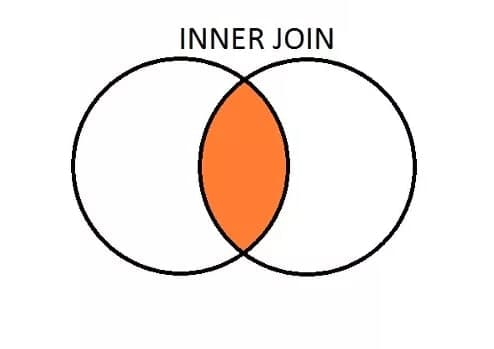

In [19]:
df = pd.merge(df1,df2,  on = ['Страховая', 'Регион'], how = 'inner').reset_index(drop=True)
df = df[df['Заключенные договора 2019'] != 0]
df['target'] = (df['Кол-во судов']) / (df['Заключенные договора 2019'])
df = df.reset_index(drop=True)
df

,Страховая,Регион,Кол-во судов,Выплаты 2019,Заключенные договора 2019,Страховые премии 2019,Средняя премия 2019,Средняя выплата 2019,target
0,"АО ""Тинькофф Страхование""",Владивосток,4,9.490856e+03,4359,2.509196e+04,5.756356,62.800112,0.000918
1,"АО ""Тинькофф Страхование""",Екатеринбург,5,2.240263e+04,19402,1.256341e+05,6.475315,62.800112,0.000258
2,"АО ""Тинькофф Страхование""",Краснодар,178,3.919003e+04,19872,1.198536e+05,6.031281,62.800112,0.008957
3,"АО ""Тинькофф Страхование""",Москва,3,4.603383e+05,68224,5.594084e+05,8.199583,62.800112,0.000044
4,"АО ""Тинькофф Страхование""",Московская область,11,3.993357e+04,28002,2.222683e+05,7.937587,62.800112,0.000393
5,"АО ""Тинькофф Страхование""",Нижний Новгород,8,2.282910e+04,9217,6.536806e+04,7.092119,62.800112,0.000868
6,"АО ""Тинькофф Страхование""",Ростов,56,2.865863e+04,13896,7.981792e+04,5.743949,62.800112,0.004030
7,"АО ""Тинькофф Страхование""",Санкт-Петербург,12,4.871250e+04,31324,2.336083e+05,7.457805,62.800112,0.000383
8,"АО ""Тинькофф Страхование""",Санкт-Петербург,12,9.470782e+03,6009,3.741368e+04,6.226274,62.800112,0.001997
9,"АО ""АльфаСтрахование""",Владивосток,195,5.686420e+05,67973,3.491685e+05,5.136871,61.639939,0.002869


In [20]:
df.shape[0]
df.to_excel('OSAGO_results.xlsx')

# Данные для обучения модели готовы!



## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  


Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + \sum_{j=1}^{13}{w_i x_{ij}}) - y_i)}^2} \rightarrow \min_{w_i, i=1..13},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.


# Использование линейной регрессии из библиотеки Scikit-learn из Python

### Регрессионые параметры:
- Средняя страховая выплата для страховой в выбранном регионе x1
- Средняя страховая премия для страховой в выбранном регионе x2
- Регион судебного дела x3(8 бинарных признаков)
- x1^2
- x2^2
- x1 * x2

### Целевой показатель:
- кол-во судебных дел / кол-во полисов 

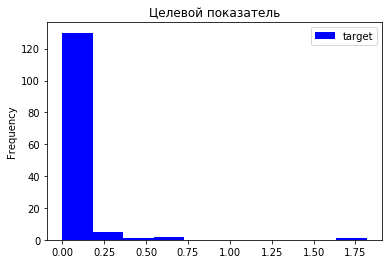

In [21]:
df.plot(y='target', kind='hist', 
           color='blue',  title='Целевой показатель')

## Зависимость target от выплат

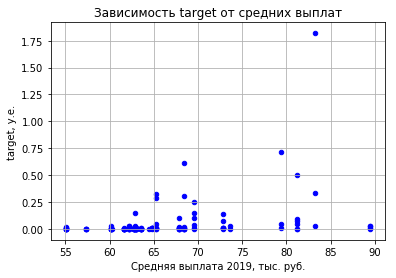

In [22]:
def scatter_h_w():
    ax = df.plot(x="Средняя выплата 2019", y="target",color = 'b', kind='scatter')
    ax.set_ylabel(u"target, у.е.")
    ax.set_xlabel(u"Средняя выплата 2019, тыс. руб.")
    ax.set_title(u"Зависимость target от средних выплат")
    ax.grid(True)
    return ax
scatter_h_w()

## Зависимость target от средней премии 2019

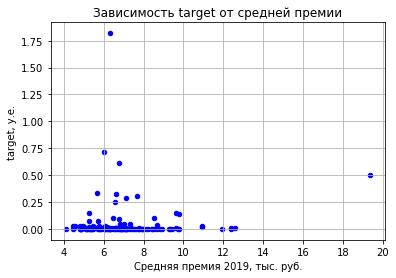

In [23]:
def scatter_h_w_1():
    ax = df.plot(x="Средняя премия 2019", y="target",color = 'b', kind='scatter')
    ax.set_ylabel(u"target, у.е.")
    ax.set_xlabel(u"Средняя премия 2019, тыс. руб.")
    ax.set_title(u"Зависимость target от средней премии")
    ax.grid(True)
    return ax
scatter_h_w_1()

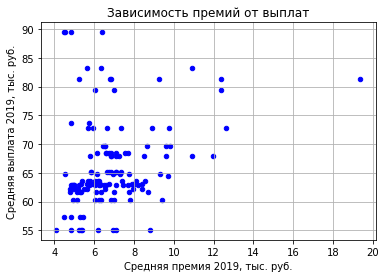

In [24]:
def scatter_h_w_3():
    ax = df.plot(x="Средняя премия 2019", y="Средняя выплата 2019",color = 'b', kind='scatter')
    ax.set_ylabel(u"Средняя выплата 2019, тыс. руб.")
    ax.set_xlabel(u"Средняя премия 2019, тыс. руб.")
    ax.set_title(u"Зависимость премий от выплат")
    ax.grid(True)
    return ax
scatter_h_w_3()

## Перевод региона из категориального признака в численный и добавление новых, "искусственных" признаков

In [25]:
df_tmp = df
df_tmp.head(10)
df = df.drop(['Страховая'], axis = 1)
df = df.drop(['Кол-во судов'], axis = 1)
df = df.drop(['Заключенные договора 2019'], axis = 1)
df = df.drop(['Выплаты 2019'], axis = 1)
df = df.drop(['Страховые премии 2019'], axis = 1)

df['(Средняя премия 2019)^2'] = df['Средняя премия 2019'] * (df['Средняя премия 2019'])
df['(Средняя выплата 2019)^2'] = df['Средняя выплата 2019'] * (df['Средняя выплата 2019'])
df['(Средняя выплата 2019 / Средняя премия 2019)'] = df['Средняя выплата 2019'] * (df['Средняя премия 2019'])

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction import DictVectorizer as DV


regions = df_tmp['Регион'].unique()
print(regions)

encoder = DV(sparse = False)
onehotencoder = OneHotEncoder([regions], handle_unknown='error', sparse=True)


encoded_data = encoder.fit_transform(df.T.to_dict().values())

['Владивосток' 'Екатеринбург' 'Краснодар' 'Москва' 'Московская область'
 'Нижний Новгород' 'Ростов' 'Санкт-Петербург']


In [27]:
df = pd.DataFrame(encoded_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,361.499790,3943.854022,33.135633,0.000918,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.800112,5.756356
1,406.650525,3943.854022,41.929709,0.000258,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,62.800112,6.475315
2,378.765140,3943.854022,36.376354,0.008957,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,62.800112,6.031281
3,514.934728,3943.854022,67.233161,0.000044,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.800112,8.199583
4,498.481344,3943.854022,63.005286,0.000393,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,62.800112,7.937587


В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

Напишем функцию, которая по трём параметрам $w_0$, $w_1$,  $w_2$ и $w_3$ вычисляет квадратичную ошибку приближения зависимости target $y$ от 3-х параметров $x$ гиперплоскостью $y = w_0 + \sum_{i=1}^{13} {w_i x_i}$:
$$error(w_0, w_1, w_2, w_3) = \sum_{i=1}^{n} {(y_i - (w_0 + \sum_{i=1}^{13} {w_i x_i})} ^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – target и вектор признаков $i$-ой страховой в регионе. 

## Разбивка выборки на обучение и тест

In [28]:
ind = list([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
X = np.array(df[ind])
y = np.array(df[3])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
X,y

(array([[3.61499790e+02, 3.94385402e+03, 3.31356328e+01, ...,
         0.00000000e+00, 6.28001116e+01, 5.75635586e+00],
        [4.06650525e+02, 3.94385402e+03, 4.19297086e+01, ...,
         0.00000000e+00, 6.28001116e+01, 6.47531533e+00],
        [3.78765140e+02, 3.94385402e+03, 3.63763543e+01, ...,
         0.00000000e+00, 6.28001116e+01, 6.03128132e+00],
        ...,
        [3.68762702e+02, 3.97058441e+03, 3.42483414e+01, ...,
         0.00000000e+00, 6.30125734e+01, 5.85220825e+00],
        [4.98653817e+02, 3.97058441e+03, 6.26244411e+01, ...,
         1.00000000e+00, 6.30125734e+01, 7.91356058e+00],
        [3.56334183e+02, 3.97058441e+03, 3.19786804e+01, ...,
         1.00000000e+00, 6.30125734e+01, 5.65496953e+00]]),
 array([9.17641661e-04, 2.57705391e-04, 8.95732689e-03, 4.39727955e-05,
        3.92829084e-04, 8.67961376e-04, 4.02993667e-03, 3.83092836e-04,
        1.99700449e-03, 2.86878614e-03, 8.12731038e-04, 9.07102857e-03,
        2.34090359e-04, 5.23070291e-04, 2.5575776

In [29]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
y_pred_sm = model.predict(X_test) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     2.360
Date:                Sun, 30 May 2021   Prob (F-statistic):            0.00961
Time:                        19:37:04   Log-Likelihood:                 48.573
No. Observations:                 125   AIC:                            -71.15
Df Residuals:                     112   BIC:                            -34.38
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0004      0.001     -0.349      0.728      -0.003       0.002
x2         -2.822e-05      0.000     -0.128      0.898      -0.000       0.000
x3             0.0015      0.002      0.640      0.523      -0.003       0.006
x4            -0.5894      1.205     -0.489      0.626      -2.977       1.798
x5            -0.6387      1.199     -0.533      0.595      -3.013       1.736
x6            -0.4725      1.198     -0.394      0.694      -2.846       1.901
x7            -0.6829      1.193     -0.572      0.568      -3.047       1.681
x8            -0.6516      1.198     -0.544      0.588      -3.025       1.722
x9            -0.6153      1.197     -0.514      0.608      -2.986       1.756
x10           -0.5925      1.201     -0.493      0.623      -2.972       1.787
x11           -0.6373      1.201     -0.530      0.597      -3.018       1.743
x12            0.0118      0.033      0.352      0.726      -0.055       0.078
x13            0.0182      0.077      0.236      0.814      -0.134       0.171
==============================================================================
Omnibus:                      209.673   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21749.948
Skew:                           6.968   Prob(JB):                         0.00
Kurtosis:                      66.101   Cond. No.                     1.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Обучение

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


linear_regression_model = LinearRegression(normalize = True, n_jobs = -1)
linear_regression_model.fit(X_train, y_train)
y_pred_skl = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_pred_skl, y_test) 
mae = mean_absolute_error(y_pred_skl, y_test) 

## Оценка качества модели

In [31]:
print(y_pred_skl)
print(y_pred_sm)
print(y_test)

[ 0.01900806 -0.05002073  0.03256842 -0.02817633 -0.02207602  0.06728265
  0.0241173   0.12674735  0.00066971 -0.00349079  0.17923808  0.02377579
  0.03696408  0.11985804]
[ 0.01900806 -0.05002073  0.03256842 -0.02817633 -0.02207602  0.06728265
  0.0241173   0.12674735  0.00066971 -0.00349079  0.17923808  0.02377579
  0.03696408  0.11985804]
[1.40022494e-03 1.55504926e-03 4.02993667e-03 4.39727955e-05
 1.39653969e-03 3.68867577e-04 1.07955489e-02 5.37634409e-03
 1.71759823e-03 1.04056628e-02 8.75656743e-03 8.67961376e-04
 4.70646520e-03 7.14285714e-01]


In [32]:
print("===Scikit Learn Regression===")
print("MSE = ", mse)
print("MSE / mean_y = ", mse / y_test.mean())
print("MAE = ", mae)

print("\n\n\n===Statsmodels Regression===")
print("MSE = ", ((y_pred_sm - y_test)**2).mean())
print("MSE / mean_y = ", mse / y_test.mean())
print("MAE = ", (abs(y_pred_sm - y_test)).mean())

===Scikit Learn Regression===
MSE =  0.029191819643873167
MSE / mean_y =  0.5337364903762674
MAE =  0.08471717662963665



===Statsmodels Regression===
MSE =  0.0291918196438736
MSE / mean_y =  0.5337364903762674
MAE =  0.08471717662963658


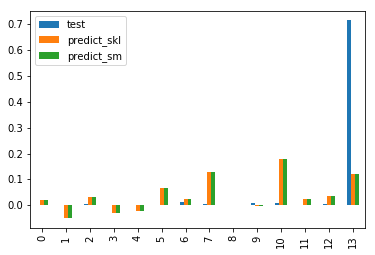

In [33]:
data = {'test': y_test,
        'predict_skl': y_pred_skl,
        'predict_sm': y_pred_sm}
res = pd.DataFrame(data)
res.plot(kind='bar')
plt.show()

## Вывод:
Гипотеза не верна, поскольку слишком большая неточность на тестовой выборке. 
## Причины
1) Неверное предположение о взаимосвязи параметров

2) Маленький объём выборки
